In [139]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#cmap = ListedColormap(sns.color_palette("husl", len(gs.classes_)))

### Inspection

In [140]:
fraud = pd.read_csv('/Users/isabellanoyen/Downloads/creditcard.csv')

In [141]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [142]:
fraud.shape

(284807, 31)

In [143]:
fraud.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [144]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [145]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### EDA

In [9]:
## Fantastic data explorer function that I should use for all datasets

def data_explore(df, k=1.5):
    '''Function takes in a dataframe as an arguement and returns a dataframe with a summary of each column, containing;
    - Data Type
    - Missing Values (%)
    - Overview: For numeric columns >> [min, max, mean, 50%]
                Else                >> [Unique values]
    - Number of outliers (as defined by k * the IQR, default value is 1.5 but can be set as an arguement)
    Dataframe is sorted first by missing values (high > low) and then by number of outliers (high > low)
    '''
    
    IQR_k = 1.5
    
    list_numerics = df.select_dtypes(include=['int','float']).columns
    
    data_types= df.dtypes
    
    missing = round((df.isnull().sum()/df.shape[0]),5)*100
    
    overview = df.apply(lambda x: [round(x.min()),
                                     round(x.max()),
                                     round(x.mean()),
                                     round(x.quantile(0.5))] if x.name in list_numerics else x.unique())
    
    outliers = df.apply(lambda x: sum((x<(x.quantile(0.25)- k*(x.quantile(0.75)-x.quantile(0.25))))|
                                     (x>(x.quantile(0.75)+ k*(x.quantile(0.75)-x.quantile(0.25))))
                                     if x.name in list_numerics else ''))
    
    return pd.DataFrame({'Type': data_types,
                      'Missing (%)': missing,
                      'Overview': overview,
                      'Outliers': outliers}).sort_values(by=['Missing (%)','Type'],ascending=False)

In [10]:
data_explore(fraud)

,Type,Missing (%),Overview,Outliers
Time,float64,0.0,"(T, i, m, e)",0
V1,float64,0.0,"(V, 1)",7062
V2,float64,0.0,"(V, 2)",13526
V3,float64,0.0,"(V, 3)",3363
V4,float64,0.0,"(V, 4)",11148
V5,float64,0.0,"(V, 5)",12295
V6,float64,0.0,"(V, 6)",22965
V7,float64,0.0,"(V, 7)",8948
V8,float64,0.0,"(V, 8)",24134
V9,float64,0.0,"(V, 9)",8283


In [11]:
## The data doesn't seem to tell me much about the anonymised data too much. 
## With the massive number of outliers, it's very unclear what's happening. 

In [12]:
fraud.V22.value_counts()

-0.816264    77
 0.844627    77
-0.984262    62
-0.080587    60
-0.996937    53
             ..
-1.052507     1
-1.893226     1
 0.087224     1
-0.572146     1
-0.126533     1
Name: V22, Length: 275663, dtype: int64

### Make sure to always use this correlation heatmap for future reference. 

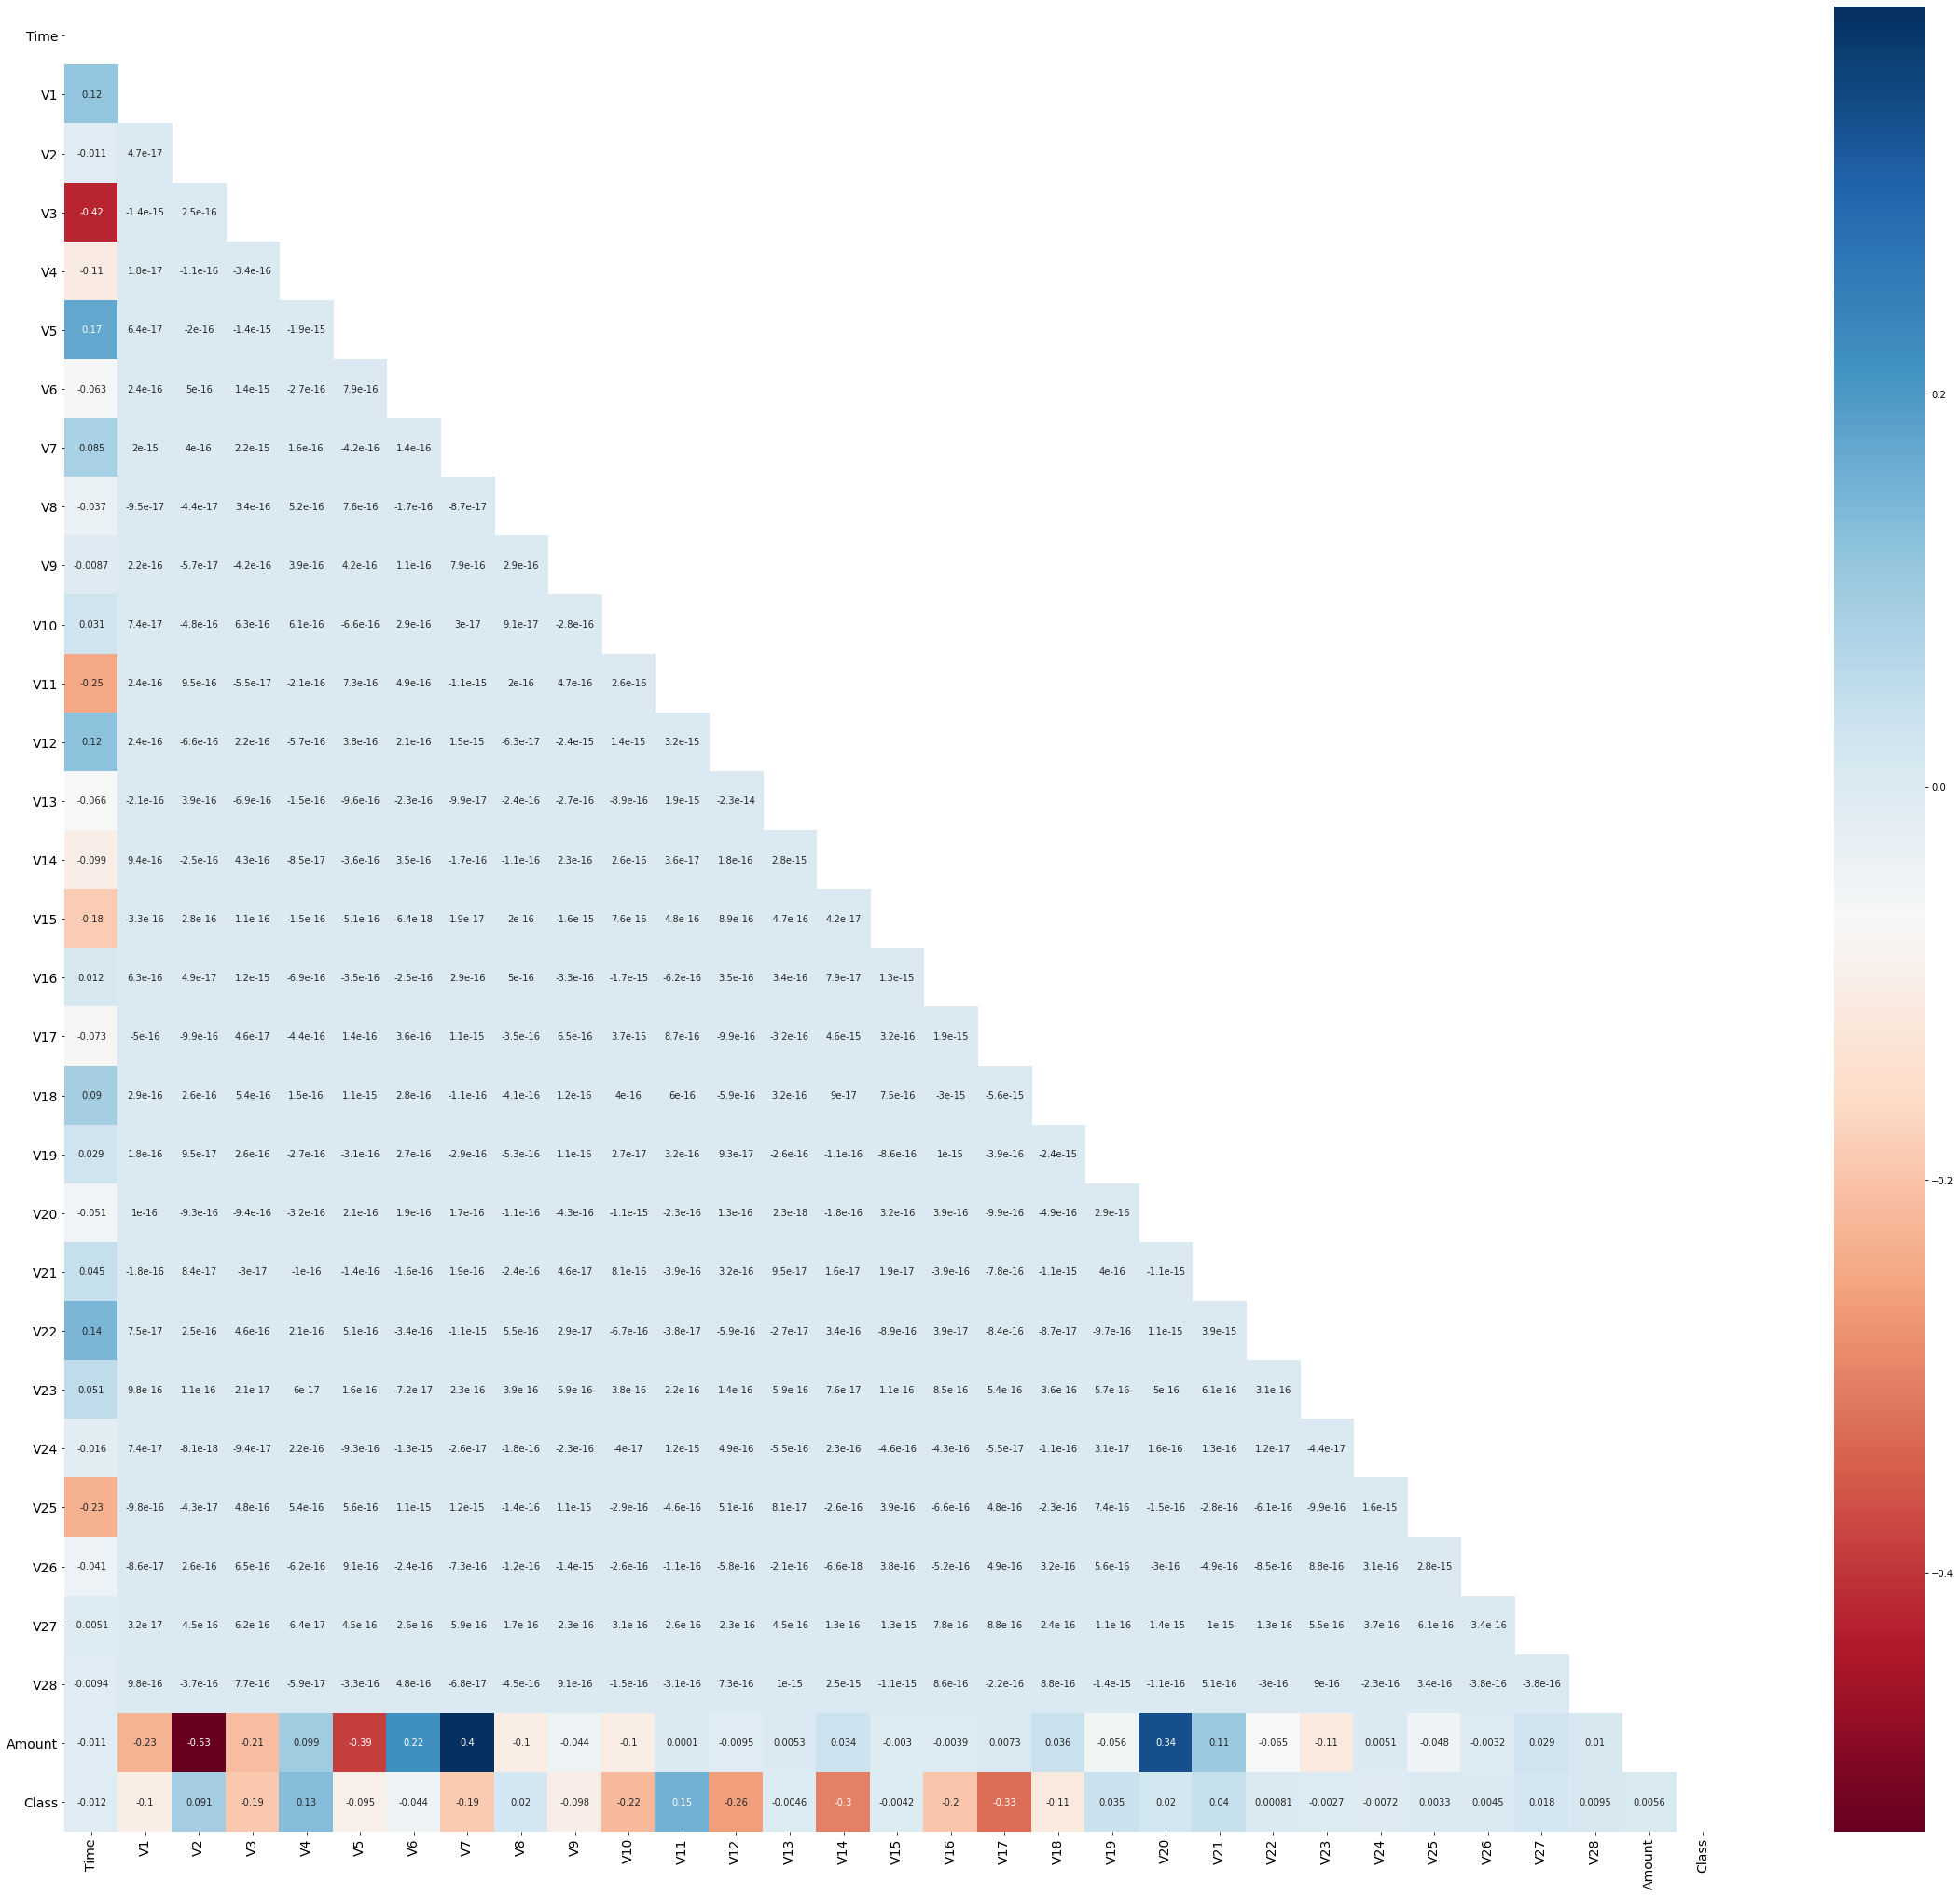

In [13]:
def correlation_heat_map(df):
    corrs = df.corr()

    fig, ax = plt.subplots(figsize=(40, 36))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='RdBu')

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    return fig, ax

fig, ax = correlation_heat_map(fraud)

In [146]:
fraud.V3.skew()

-2.240155440240421

In [158]:
fraud.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [148]:
fraud[fraud['Class'] == 1][['V3','Time','Amount']].describe()

,V3,Time,Amount
count,492.000000,492.000000,492.000000
mean,-7.033281,80746.806911,122.211321
std,7.110937,47835.365138,256.683288
min,-31.103685,406.000000,0.000000
25%,-8.643489,41241.500000,1.000000
50%,-5.075257,75568.500000,9.250000
75%,-2.276185,128483.000000,105.890000
max,2.250210,170348.000000,2125.870000


In [149]:
fraud[fraud['Class'] == 1][['V5','Time','Amount']].describe()

,V5,Time,Amount
count,492.000000,492.000000,492.000000
mean,-3.151225,80746.806911,122.211321
std,5.372468,47835.365138,256.683288
min,-22.105532,406.000000,0.000000
25%,-4.792835,41241.500000,1.000000
50%,-1.522962,75568.500000,9.250000
75%,0.214562,128483.000000,105.890000
max,11.095089,170348.000000,2125.870000


In [150]:
fraud[fraud['Class'] == 1][['V5','Time','Amount']].tail(15)

,V5,Time,Amount
263274,-0.216267,160870.0,0.77
263324,-3.301910,160895.0,127.14
263877,-1.100500,161154.0,0.38
268375,-0.364432,163181.0,39.98
272521,2.497367,165132.0,12.31
274382,9.880564,165981.0,0.00
274475,0.474761,166028.0,39.90
275992,-0.010547,166831.0,634.30
276071,-0.620324,166883.0,19.95
276864,-1.688433,167338.0,349.08


In [151]:
fraud[(fraud['Class'] == 1) & (fraud['Amount'] >= 105)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
8972,12393.0,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,...,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66,1
10630,17838.0,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,...,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,766.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1


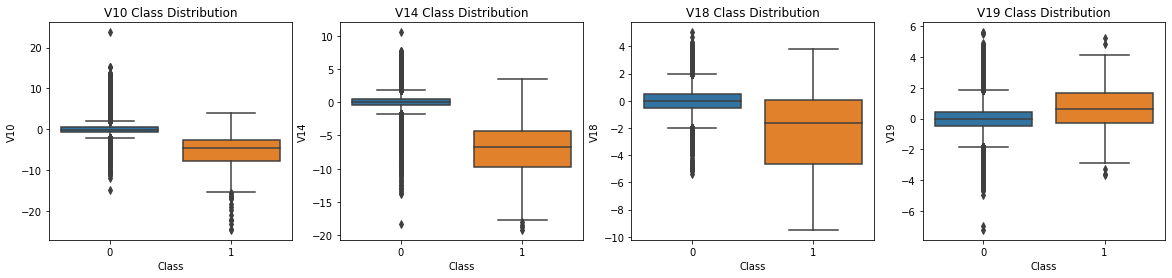

In [157]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=fraud, ax=axes[0])
axes[0].set_title('V10 Class Distribution')

sns.boxplot(x="Class", y="V14", data=fraud, ax=axes[1])
axes[1].set_title('V14 Class Distribution')


sns.boxplot(x="Class", y="V18", data=fraud, ax=axes[2])
axes[2].set_title('V18 Class Distribution')


sns.boxplot(x="Class", y="V19", data=fraud, ax=axes[3])
axes[3].set_title('V19 Class Distribution')

plt.show()

### Prepare the train and test split

In [20]:
testing = fraud.copy()

In [21]:
y = testing.pop('Class')

In [22]:
testing.shape

(284807, 30)

In [24]:
X = testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.25, random_state=7)

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Run a simple LogisticRegression

In [31]:
model = LogisticRegression(solver='liblinear', verbose=5)

model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=5)

In [33]:
#Get the predictions
predictions = model.predict(X_test)

#Print accuracy
print('Accuracy Score:', accuracy_score(y_test, predictions))
print()

#Check the value counts
predictions_df = pd.DataFrame(predictions)
print(predictions_df[0].value_counts())

Accuracy Score: 0.9989887924496503

0    71111
1       91
Name: 0, dtype: int64


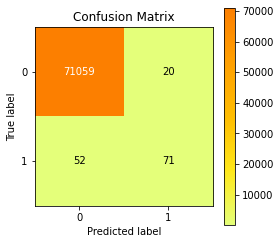

In [34]:
#CONFUSION
import scikitplot as skplt
from sklearn.metrics import classification_report

skplt.metrics.plot_confusion_matrix(y_test, predictions, figsize=(4,4), cmap='Wistia')
plt.show()

##### Accuracy is not the only measure. High accuracy will just err on the side of predicting everything as the majority class. Since we have a major issue with our data, we need to make sacrifices or restate the problem. What can we live with? What can't we live without? If we predict that someone has fraud when they don't, would that be the worst thing (assuming we keep the number of misclassifications as small as possible)? What we really need is to absolutely minimize the amount of times our model fails to predict a true fraud case (need to learn the name for this, false negative for fraud).

#### Let's begin with testing is using balanced classes built into the models will make a difference

In [74]:
def test_models(models, X=None, y=None, split_data=True, scaler_type=StandardScaler()):    
    results = {}
    fitted_models = {}
    train_test_sets = {}
    for i in models:
        print(f"{i} model is currently running...")
        # split data
        if split_data:
            X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=7)
        else:
            X_train, X_test, y_train, y_test = X[0], X[1], y[0], y[1]
            #print(X_train, X_test, y_train, y_test)
        train_test_sets[i] = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
        # scale X if relevant
        if scaler_type is not None:
            scaler = scaler_type
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        # fit models
        train_model = models[i].fit(X_train, y_train)
        print(f'{i} model fitted successfully.')
        results[i] = pd.DataFrame(train_model.cv_results_)
        fitted_models[i] = train_model
        
    return results, fitted_models, train_test_sets

In [76]:
logit_params = {'C': np.logspace(-2, 2, 2),
          'penalty': ['l2'],
          'fit_intercept': [True, False],
          'max_iter': [1000],
          'verbose': [1],
          'class_weight': ['balanced'],
          'random_state': [7]}

knn_params = {'n_neighbors': [1,25,50,100],
        }

cart_params = {
    'max_depth': list(range(1, 12))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01],
    'class_weight': ['balanced']
            }

random_params = {
    'n_estimators': [10, 100, 250],
    'max_depth': [3, 5, 9],
    'class_weight': ['balanced']
}

kwargs = {
    'cv':7,
    'n_jobs':2,
    'return_train_score':True,
    'verbose': True
}

models = {
    'logit': GridSearchCV(LogisticRegression(), param_grid=logit_params, **kwargs),
    'cart': GridSearchCV(DecisionTreeClassifier(), param_grid=cart_params, **kwargs),
    'knn' : GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, **kwargs),
    'random_forest': GridSearchCV(RandomForestClassifier(), param_grid=random_params, **kwargs)
}

X, y = (X_train, X_test), (y_train, y_test)
results, gs, train_test_sets = test_models(models, X=X, y=y, split_data=False, scaler_type=None)

logit model is currently running...
Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:   34.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


logit model fitted successfully.
cart model is currently running...
Fitting 7 folds for each of 1152 candidates, totalling 8064 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 16.5min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 28.0min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 35.6min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 46.4min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 69.2min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 79.4min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 101.5min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 115.2min
[Parallel(n_jobs=2)]: Done 8064 out of 8064 | elapsed: 134.2min finished


cart model fitted successfully.
knn model is currently running...
Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 out of  28 | elapsed:  4.1min finished


knn model fitted successfully.
random_forest model is currently running...
Fitting 7 folds for each of 9 candidates, totalling 63 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 19.0min
[Parallel(n_jobs=2)]: Done  63 out of  63 | elapsed: 38.5min finished


random_forest model fitted successfully.


logit
Best Parameters:
{'C': 100.0, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 7, 'verbose': 1}
Best estimator mean cross validated training score:
0.9642377285175909
Best estimator score on the full training set:
0.9651880808033519
Best estimator score on the test set:
0.965450408696385
AxesSubplot(0.125,0.125;0.62x0.755)


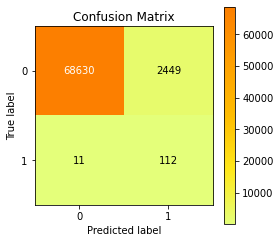

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.04      0.91      0.08       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.97      0.98     71202



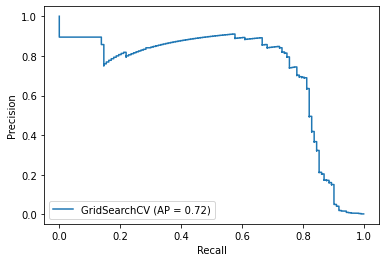



cart
Best Parameters:
{'ccp_alpha': 0, 'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_split': 4}
Best estimator mean cross validated training score:
0.99917136771143
Best estimator score on the full training set:
0.9999672292315255
Best estimator score on the test set:
0.9991011488441336
AxesSubplot(0.125,0.125;0.62x0.755)


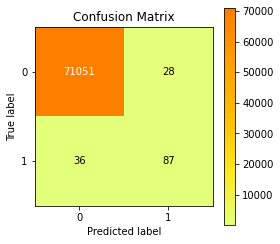

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.71      0.73       123

    accuracy                           1.00     71202
   macro avg       0.88      0.85      0.87     71202
weighted avg       1.00      1.00      1.00     71202



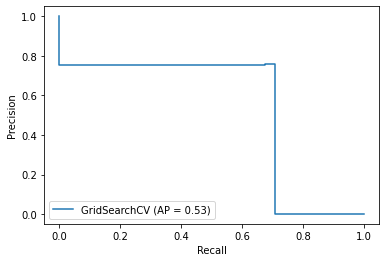



knn
Best Parameters:
{'n_neighbors': 25}
Best estimator mean cross validated training score:
0.9982725123475574
Best estimator score on the full training set:
0.9982725123475574
Best estimator score on the test set:
0.9982725204348193
AxesSubplot(0.125,0.125;0.62x0.755)


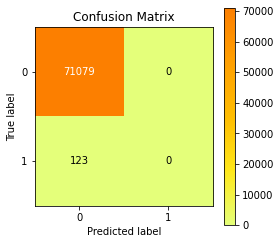

/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



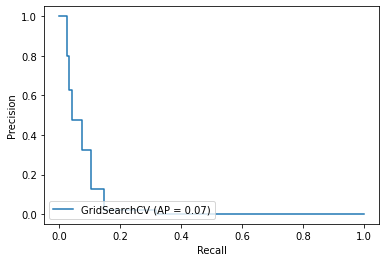



random_forest
Best Parameters:
{'class_weight': 'balanced', 'max_depth': 9, 'n_estimators': 250}
Best estimator mean cross validated training score:
0.9994428969359331
Best estimator score on the full training set:
0.9997378338522038
Best estimator score on the test set:
0.9994382180275835
AxesSubplot(0.125,0.125;0.62x0.755)


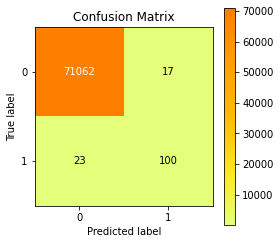

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.81      0.83       123

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



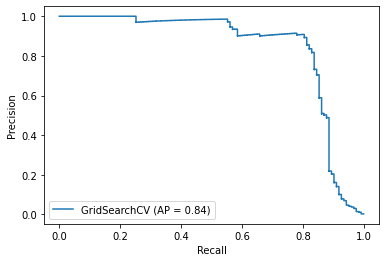

In [77]:
for k, v in gs.items():
    if k == 'Logit':
        print(k)
        print('Best Parameters:')
        print(v.best_params_)
        print('Best estimator mean cross validated training score:')
        print(v.best_score_)
        print('Best estimator score on the full training set:')
        print(v.score(train_test_sets[k]['X_train'], train_test_sets[k]['y_train']))
        print('Best estimator score on the test set:')
        print(v.score(train_test_sets[k]['X_test'], train_test_sets[k]['y_test']))
        print('Best estimator coefficients:')
        logr_model1_coefs = pd.DataFrame(list(zip(Xc.columns, v.best_estimator_.coef_[0])), columns=['feature', 'coef']).sort_values(by='coef')
        logr_model1_coefs
        print(skplt.metrics.plot_confusion_matrix(y_test, v.predict(X_test), figsize=(4,4), cmap='Wistia'))
        plt.show()
        print(metrics.classification_report(y_test, v.predict(X_test)))
        print(disp = plot_precision_recall_curve(v, X_test, y_test))
        plt.show()
        print('\n')
    else:
        print(k)
        print('Best Parameters:')
        print(v.best_params_)
        print('Best estimator mean cross validated training score:')
        print(v.best_score_)
        print('Best estimator score on the full training set:')
        print(v.score(train_test_sets[k]['X_train'], train_test_sets[k]['y_train']))
        print('Best estimator score on the test set:')
        print(v.score(train_test_sets[k]['X_test'], train_test_sets[k]['y_test']))
        print(skplt.metrics.plot_confusion_matrix(y_test, v.predict(X_test), figsize=(4,4), cmap='Wistia'))
        plt.show()
        print(metrics.classification_report(y_test, v.predict(X_test)))
        print(plot_precision_recall_curve(v, X_test, y_test))
        plt.show()
        print('\n')

### Let's check a few more final models

In [48]:
randomforrest = RandomForestClassifier()

# Grid Search: Random Forest
params = { 
    'max_depth': [3, 5, 9], 
    'n_jobs': [2], 
    'random_state': [7],
    'n_estimators': [100],
    'verbose': [1],
    'class_weight': ['balanced']}

gs = GridSearchCV(randomforrest, param_grid=params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.score(X_train, y_train))
print(gs.best_score_)
print(gs.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   22.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   21.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.8s
[Parallel(n_jobs=2)]: Done 100

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=2,
                       random_state=7, verbose=1)


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.9997097446220828
0.9994428969359331


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s


0.9994522625768939


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


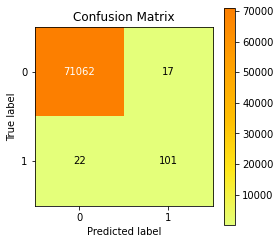

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, gs.predict(X_test), figsize=(4,4), cmap='Wistia')
plt.show()

In [64]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [65]:
y_predictions = clf.predict(X_test)

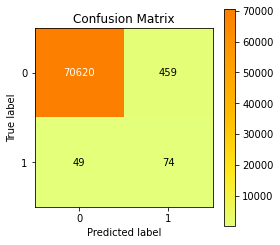

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, y_predictions, figsize=(4,4), cmap='Wistia')
plt.show()

In [98]:
### This time using RandomForest and balanced subsamples for every tree grown

randomforrest = RandomForestClassifier()

# Grid Search: Random Forest
params = { 
    'max_depth': [3, 5, 9, 11, 13], 
    'n_jobs': [2], 
    'random_state': [7],
    'n_estimators': [10, 50, 100, 1000],
    'verbose': [1],
    'class_weight': ['balanced','balanced_subsample']}

gs = GridSearchCV(randomforrest, param_grid=params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.score(X_train, y_train))
print(gs.best_score_)
print(gs.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  1

[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  4.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   53.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  3.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   16.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   16.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   16.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs

[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  5.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  5.5min finished
[Parallel(n_jobs=2)

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   57.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   50.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]:

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=2)]: Using backend Threading

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  8.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   25.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.0s
[Parallel(n_jobs=2)]: Done 100

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.0min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  8.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   21.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   21.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   41.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 796 tasks      | 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   16.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   17.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.3s
[Parallel(n_jobs=2)]: Done  50

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  5.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   47.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   48.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   49.2s finished
[Parallel(n_jobs=2)]: Using backend

[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:

[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  8.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.1min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  8.9min finished
[Parallel(n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   26.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   24.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   26.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=2)]: Done  50

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  7.2min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  9.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 796

RandomForestClassifier(class_weight='balanced_subsample', max_depth=9,
                       n_estimators=50, n_jobs=2, random_state=7, verbose=1)


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.9997003815453758
0.9994663046277007
0.9994241734782731


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


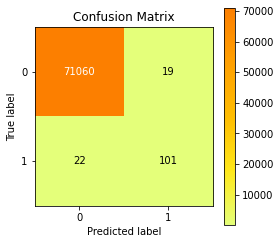

In [99]:
skplt.metrics.plot_confusion_matrix(y_test, gs.predict(X_test), figsize=(4,4), cmap='Wistia')
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


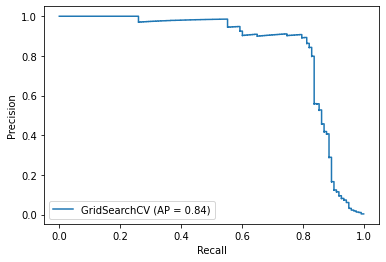

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.82      0.83       123

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [100]:
plot_precision_recall_curve(gs, X_test, y_test)
plt.show()

print(metrics.classification_report(y_test, gs.predict(X_test)))

#### Find a way to improve the sensitivity of the model because the cost of falsely predicting no fraud could be extremely costly to both parties (apart from the fraudster of course)

#### LogisticRegression does the best job of managing the cost of a true postitives. Let's try and see if we can tune it further to eliminate further cost.

In [93]:
### Logistic Regression

logit = LogisticRegression()

# Grid Search: LR
params = {
        'C': np.logspace(-4, 4, 4),
        'penalty': ['l2'],
        'fit_intercept': [True, False],
        'max_iter': [100000],
        'verbose': [1],
        'class_weight': ['balanced'],
        'random_state': [7],
        'n_jobs': [2]}

gs = GridSearchCV(logit, param_grid=params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.score(X_train, y_train))
print(gs.best_score_)
print(gs.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    7.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   14.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   14.6s finished


LogisticRegression(C=0.0001, class_weight='balanced', max_iter=100000, n_jobs=2,
                   random_state=7, verbose=1)
0.9758573067109853
0.9749303621169917
0.9761523552709194


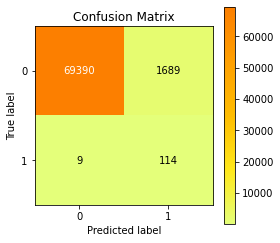

In [94]:
skplt.metrics.plot_confusion_matrix(y_test, gs.predict(X_test), figsize=(4,4), cmap='Wistia')
plt.show()

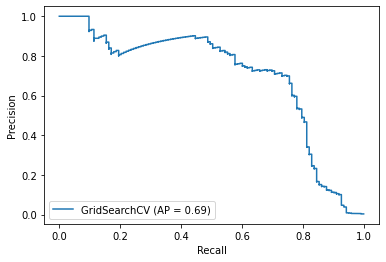

In [95]:
plot_precision_recall_curve(gs, X_test, y_test)
plt.show()

In [97]:
print(metrics.classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.93      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [86]:
### Logistic Regression with more options for C, higher max iterations and balanced subsamples for the class weight

logit = LogisticRegression()

# Grid Search: Random Forest
params = {
        'C': np.logspace(-5, 5, 10),
        'penalty': ['l2'],
        'fit_intercept': [True, False],
        'max_iter': [1000000],
        'verbose': [1],
        'class_weight': ['balanced'],
        'random_state': [7],
        'n_jobs': [2]}

gs = GridSearchCV(logit, param_grid=params, cv=7)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.score(X_train, y_train))
print(gs.best_score_)
print(gs.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    6.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    7.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   13.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   12.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    9.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    6.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

LogisticRegression(C=1e-05, class_weight='balanced', max_iter=1000000, n_jobs=2,
                   random_state=7, verbose=1)
0.9790641604831347
0.980927412747829
0.9792983343164517


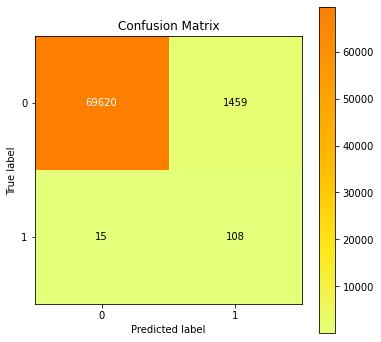

In [87]:
skplt.metrics.plot_confusion_matrix(y_test, gs.predict(X_test), figsize=(6,6), cmap='Wistia')
plt.show()

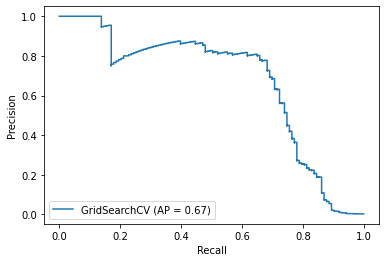

In [88]:
plot_precision_recall_curve(gs, X_test, y_test)
plt.show()

In [92]:
metrics.classification_report(y_test, gs.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99     71079\n           1       0.07      0.88      0.13       123\n\n    accuracy                           0.98     71202\n   macro avg       0.53      0.93      0.56     71202\nweighted avg       1.00      0.98      0.99     71202\n'